In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#What You're Aiming For

In this checkpoint, you are going to work on the '5G-Energy consumption' dataset that was provided by the  international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

The competition is taking place from 2023-07-05 to 2023-09-30. Fore more information click here.

Checkpoint problematic : Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

➡️ Dataset link

https://i.imgur.com/Agu9zeP.jpg




Instructions

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Select your target variable and the features
Split your dataset to training and test sets
Based on your data exploration phase select a ML regression algorithm and train it on the training set
Assess your model performance on the test set using relevant evaluation metrics
Discuss with your cohort alternative ways to improve your model performance

# Reading the dataset

In [ ]:
#importing pandas to read the dataset
import pandas as pd

# reading the dataset
df = pd.read_csv('/content/drive/MyDrive/5G_energy_consumption_dataset.csv')
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


# Cleaning the data

In [ ]:
#checking for duplicates

df.duplicated().sum()

#The function count for the duplicated rows. In our case, the result of the function is 0,
#because there are no duplicated rows"""

0

In [ ]:
#checking for missing data

df.isnull().sum()

#The function count for the null values. In our case, the result of the function is 0,
#because there are no null values in the dataset

,0
Time,0
BS,0
Energy,0
load,0
ESMODE,0
TXpower,0


# Let us perform encoding
The aim for encoding is to tranform a column's data type from a categorical feature to a numerical. So as to use them as input feature in our machine learning model.

In [ ]:
#checking the data types of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


##Encoding Time column

In [ ]:
#Encoding the BS column using labelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["Time"] = encoder.fit_transform(df['Time'])
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,0,0,64.275037,0.487936,0.0,7.101719
1,1,0,55.904335,0.344468,0.0,7.101719
2,2,0,57.698057,0.193766,0.0,7.101719
3,3,0,55.156951,0.222383,0.0,7.101719
4,4,0,56.053812,0.175436,0.0,7.101719


##Encoding the BS column

In [ ]:
#Let us encode 'BS' column

encoder = LabelEncoder()
df['BS'] = encoder.fit_transform(df['BS'])

df.info()
#Now all our columns are cleaned and in numerical,
#and they're ready to be used in our model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  int64  
 1   BS       92629 non-null  int64  
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 4.2 MB


# Checking and removing of outliers

##Handling outliers for the BS column

<Axes: ylabel='BS'>

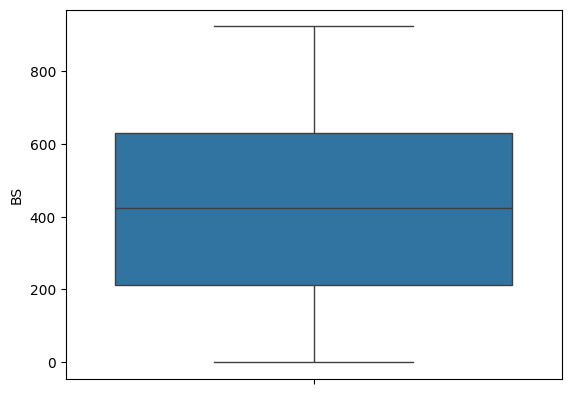

In [ ]:
#plotting the BS column to check for outliers
sns.boxplot(df['BS'])

##Handling the Energy column outliers

<Axes: ylabel='Energy'>

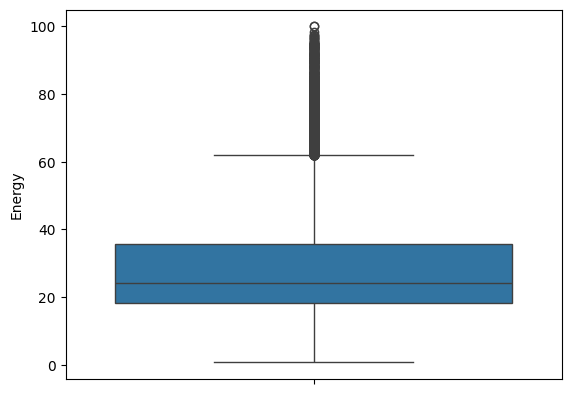

In [ ]:
#importing needed libraries
import seaborn as sns #seaborn to plot a pairplot to check for outliers
sns.boxplot(df['Energy'])

Identiying outliers

In [ ]:
# Calculate the interquartile range (IQR) for ArrDelay
Q1 = df['Energy'].quantile(0.25)
Q3 = df['Energy'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in ArrDelay
outliers = df[(df['Energy'] < lower_bound) | (df['Energy'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers in Enery: {num_outliers}")

Number of outliers in Enery: 2192


Handling the outliers in ENergy

In [ ]:
from scipy.stats import mstats

# Winsorize the ArrDelay column to cap extreme values
# The limits parameter sets the percentage of data to be capped on both ends
df['Energy'] = mstats.winsorize(df['Energy'], limits=[0.01, 0.10])

# Display the summary statistics to see the effect
print(df['Energy'].describe())

count    92629.000000
mean        27.246609
std         11.860581
min          7.922272
25%         18.236173
50%         24.065770
75%         35.724963
max         49.028401
Name: Energy, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


plotting the data after removing outliers

<Axes: ylabel='Energy'>

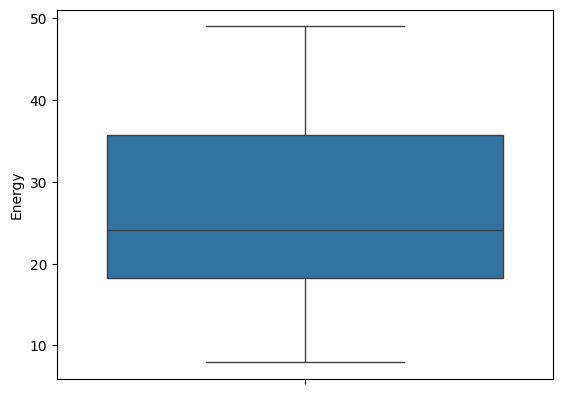

In [ ]:
# Set up the matplotlib figure
sns.boxplot(df['Energy'])

##Handling Outliers for Load column

<Axes: ylabel='load'>

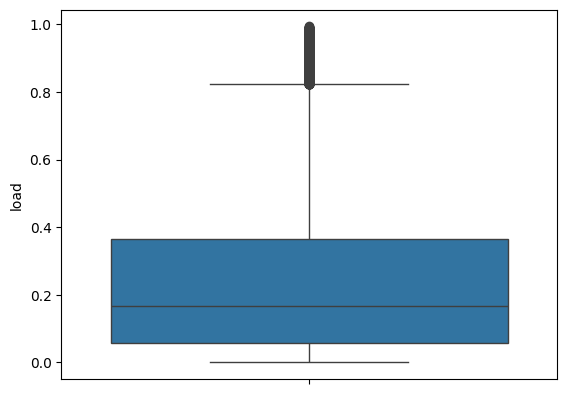

In [ ]:
#plotting the Load column before handling outliers.
sns.boxplot(df['load'])

In [ ]:
#Hnadling the outliers using winsorization method
df['load'] = mstats.winsorize(df['load'], limits=[0.01, 0.10])

# Display the summary statistics to see the effect
print(df['load'].describe())

count    92629.000000
mean         0.228529
std          0.198011
min          0.008240
25%          0.057370
50%          0.165550
75%          0.363766
max          0.608670
Name: load, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: ylabel='load'>

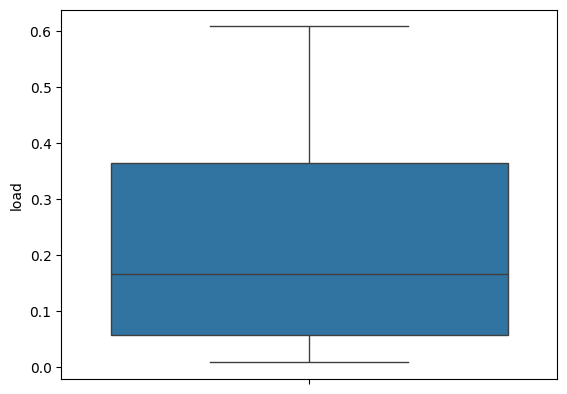

In [ ]:
#plotting the load ccolumn after handling outliers
sns.boxplot(df['load'])

##Handling outliers for Esmode column

<Axes: ylabel='ESMODE'>

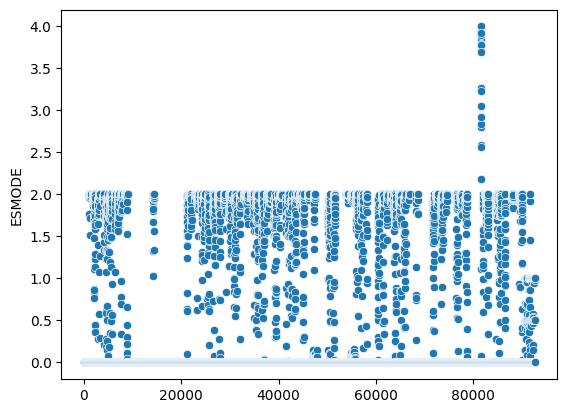

In [ ]:
#plotting the Esmode column before handling outliers
sns.scatterplot(df['ESMODE'])

In [ ]:
#Handling the outliers
df['ESMODE'] = mstats.winsorize(df['ESMODE'], limits=[0.001, 0.001])

# Display the summary statistics to see the effect
print(df['ESMODE'].describe())

count    92629.000000
mean         0.081078
std          0.380301
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ESMODE, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: ylabel='ESMODE'>

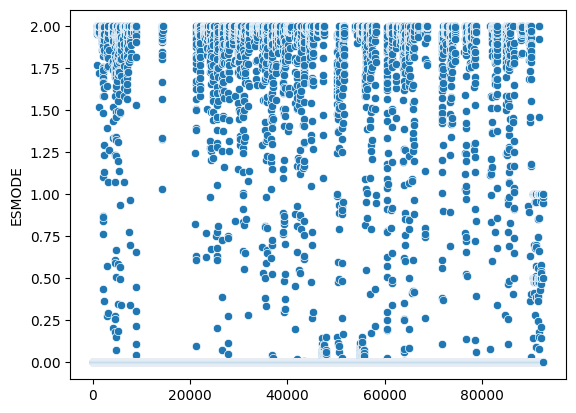

In [ ]:
#plotting the Esmode column after handling outliers
sns.scatterplot(df['ESMODE'])

##Handling outliers for TXPower column

<Axes: ylabel='TXpower'>

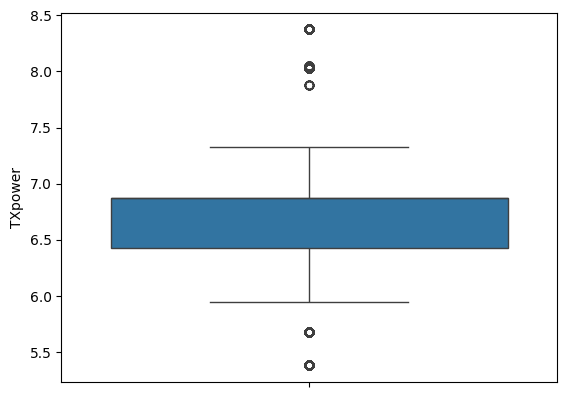

In [ ]:
#plotting the TXPOWER to check for outliers
sns.boxplot(df['TXpower'])

In [ ]:
#handling the outliers using winsorization method
df['TXpower'] = mstats.winsorize(df['TXpower'], limits=[0.01, 0.01])

# Display the summary statistics to see the effect
print(df['TXpower'].describe())

count    92629.000000
mean         6.762280
std          0.282867
min          5.979073
25%          6.427504
50%          6.875934
75%          6.875934
max          7.325859
Name: TXpower, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: ylabel='TXpower'>

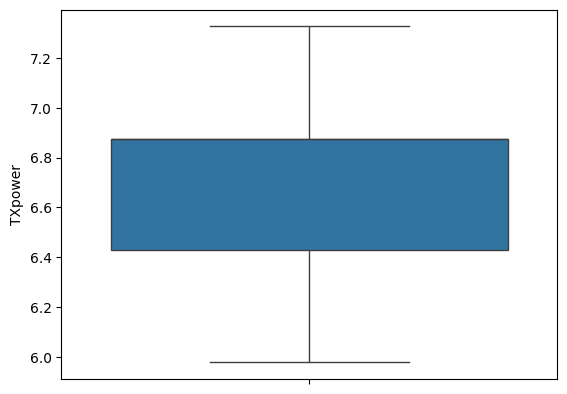

In [ ]:
#plotting the TXPOWER to confirm if the outliers have been removed
sns.boxplot(df['TXpower'])

# Creating a general pandas profile for the dataset

In [ ]:
#installing pandas profiling

!pip install pandas-Profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fd4c1bbb98a0318949a33ba00fdee237754df1b87ca6ee0972a168e936d7b842
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
#using ProfileReport to generate the profile
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='5G_energy_consumption_dataset')
profile.to_file("5G_energy_consumption_dataset.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'p

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Let us create our machine learning model
we will use Regression for our model because Regression is ideal for predicting continuous values, such as energy consumption, which is a numerical value. It helps in understanding the relationship between the dependent variable (energy consumption) and the independent variables (time, base station, load, ESMODE, TXpower).

## Feature Scaling

Feature scaling is a crucial step, which will save us time, by helping us know which variables or columns to use as our feature variables for our model

In [ ]:
#performing feature scalimg

from sklearn.preprocessing import StandardScaler
# Select features for scaling
features_to_scale = ['Time', 'BS', 'load', 'TXpower', 'ESMODE']
X = df[features_to_scale]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=features_to_scale)

X_scaled_df.head()

,Time,BS,load,TXpower,ESMODE
0,-1.613738,-1.73586,1.310073,1.199999,-0.213195
1,-1.591175,-1.73586,0.585522,1.199999,-0.213195
2,-1.568613,-1.73586,-0.175562,1.199999,-0.213195
3,-1.546050,-1.73586,-0.031039,1.199999,-0.213195
4,-1.523488,-1.73586,-0.268132,1.199999,-0.213195


## Creating the model
we now know that all columns can be used, because they all lie in the feature scaling.

The feature scaling, scales the variables into a mean of 0 and standard deviation of 1. If the scaing is lying in the range of -1 and 1, then the variables are accurate for our model. Though they can also be used if they are outside the range, but not beyond -3 and 3, if beyond 3 and -3, then they are not accurate for our model.

In [ ]:
#importing necessary libraries for our model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Splitting data into features and target

In [ ]:
x = df[['Time', 'BS', 'load', 'ESMODE', 'TXpower']]
y = df['Energy'].values

Splitting data with test size of 30%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Splitting data with test size of 30%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

#build linear regression model
model = LinearRegression()

#fitting the training data
model.fit(x_train,y_train)

#testing our model’s performance
predicted = model.predict(x_test)

Calculating the accuracy of our model using MSE and R-Squared

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("The Mean Squared Error of our dataset is: ", mean_squared_error(y_test,predicted))
print("The R squared of our dataset is: ", metrics.r2_score(y_test,predicted))


The Mean Squared Error of our dataset is:  58.91175942638825
The R squared of our dataset is:  0.5809464925256873
